# Inaugural Project - by Josefine, Viktor and Pernille

> **Table of contents** 
> 1. We import and set magics for our **inaugural project**.
> 1. We solve questions 1-5
> 1. We conclude

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# Question 1

We illustrate how the following expression changes with varying alpha and sigma values $$ \frac{H_F}{H_M} $$  

The expression depicts the relationship for homeproduction between females and males. We solve question 1:

In [3]:
# We define lists for the varying alpha and sigma values
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# We solve the model using the defined lists of values for sigma and alpha
for alpha in alpha_list:    
    for sigma in sigma_list:
        
        # Assigning values to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model
        opt = model.solve_discrete()

        # Print results
        print(f"alpha = {alpha:.2f}, sigma = {sigma:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.2f}")

c:\Users\vikto\Documents\A Økonomi\8. Semester\IntroProg\Python og VScode\projects-2023-jos-p-og-tex\inauguralproject\inauguralproject.py:73: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha = 0.25, sigma = 0.50 -> HF/HM = 3.00/5.50 = 0.55
alpha = 0.25, sigma = 1.00 -> HF/HM = 2.00/6.50 = 0.31
alpha = 0.25, sigma = 1.50 -> HF/HM = 1.50/7.00 = 0.21
alpha = 0.50, sigma = 0.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.00 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.75, sigma = 0.50 -> HF/HM = 5.50/3.00 = 1.83
alpha = 0.75, sigma = 1.00 -> HF/HM = 6.50/2.00 = 3.25
alpha = 0.75, sigma = 1.50 -> HF/HM = 7.00/1.50 = 4.67


In [4]:
# Evt. lav plot over resultaterne

From these results we gather, that Alpha represents how productive the female is in the household and Sigma represents the elasticity of substitution. Meaning that:

- For alpha = 0.5 the male and female are equally productive and sigma has no effect. 
- For alpha > 0.5 the female is more productive, and for wF = wM = 1, the female will work more hours in the household compared to the male. 
- For alpha < 0.5 the female is less productive, and for wF = wM = 1, the female will work less hours in the household compared to the male.

# Question 2

We plot the following logaritmic functions against eachother using varying values for female wage: $$ log\frac{H_F}{H_M} \\\ \\\ log\frac{w_F}{w_M}$$ 

We solve question 2:

wF = 0.80 -> HF/HM = 5.00/4.00 = 1.250
wF = 0.90 -> HF/HM = 4.50/4.50 = 1.000
wF = 1.00 -> HF/HM = 4.50/4.50 = 1.000
wF = 1.10 -> HF/HM = 4.00/4.50 = 0.889
wF = 1.20 -> HF/HM = 4.00/5.00 = 0.800


Text(0, 0.5, '$ log(H_F/H_M) $')

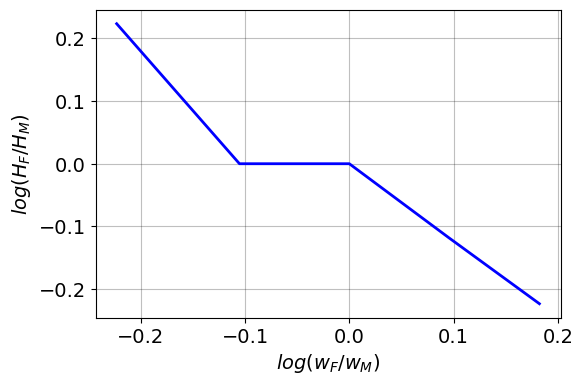

In [5]:
# We define a new model = model2 to overwrite changes made in previous questions
model2 = HouseholdSpecializationModelClass()

# We create an empty list to store values of w and H 
w_log = []
H_log = []

# We create a for loop 
for wF in model2.par.wF_vec:    

# xxx
        model2.par.wF = wF

        # Solving the model
        opt = model2.solve_discrete()
        w_log.append(np.log(model2.par.wF/model2.par.wM))
        H_log.append(np.log(opt.HF/opt.HM))

        # Print results
        print(f"wF = {wF:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.3f}")

# We plot the results
fig1 = plt.figure(figsize = (6,4))
ax = fig1.add_subplot(1,1,1)

ax.plot(w_log,H_log,ls='-',lw=2,color='blue')

ax.set_xlabel('$ log(w_F/w_M) $')
ax.set_ylabel('$ log(H_F/H_M) $')


Our plot depicts the relationsship between log of the relative homeproduction and log of relative wages. The plot showcases, that when the wage ratio increases, then the production in the household decreases. **TILFØJ MER**

# Question 3

In question 3 we assume that time is continous rather than discrete.

Again we plot the following logaritmic functions against eachother using varying values for female wage: $$ log\frac{H_F}{H_M} \\\ \\\ log\frac{w_F}{w_M}$$ 

wF = 0.80 -> HF/HM = 5.12/4.09 = 1.250
wF = 0.90 -> HF/HM = 4.75/4.27 = 1.111
wF = 1.00 -> HF/HM = 4.45/4.45 = 1.000
wF = 1.10 -> HF/HM = 4.22/4.64 = 0.909
wF = 1.20 -> HF/HM = 4.03/4.83 = 0.833


Text(0, 0.5, '$ log(H_F/H_M) $')

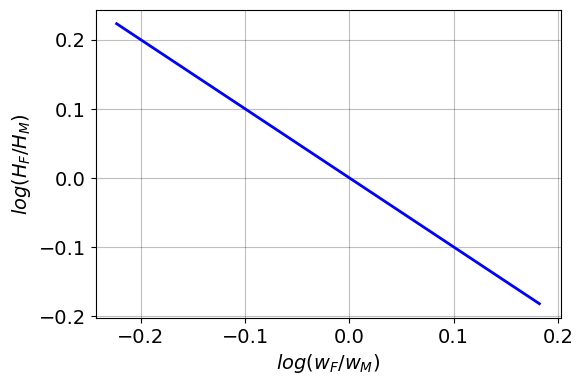

In [6]:
# We define a new model = model3 to overwrite changes made in the previous questions
model3 = HouseholdSpecializationModelClass()

# Create an empty list to store values of w and H 
w_log2 = []
H_log2 = []

# We create a for loop 
for wF in model3.par.wF_vec:    

# xxx
        model3.par.wF = wF

        # Solving the model
        opt = model3.solve()
        w_log2.append(np.log(model3.par.wF/model3.par.wM))
        H_log2.append(np.log(opt.HF/opt.HM))

        # Print results
        print(f"wF = {wF:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.3f}")

# We plot the results
fig2 = plt.figure(figsize = (6,4))
ax = fig2.add_subplot(1,1,1)

ax.plot(w_log2,H_log2,ls='-',lw=2,color='blue')

ax.set_xlabel('$ log(w_F/w_M) $')
ax.set_ylabel('$ log(H_F/H_M) $')



# Question 4

In Siminski and Yetsenga (2022), *Specialization, Comparative Advantage, and the Sexual Division of Labor*, the following regression is run on time use data of couple:

$$ log\frac{H_F}{H_M} = beta_0 + beta_1*log\frac{w_F}{w_M}$$ 

They estimate the betavalues to be approx. $$ beta_0 = 0.4 $$ $$ beta_1 = -0.1 $$

In question 4 we estimate values of alpha and sigma that gets us closest to the values found in Siminski and Yetsenga (2022). We do this by creating a for loop that run through different values of sigma and alpha until it reaches the values that minimize the following expression:

 $$ (beta_0 - betahat_0)^2 + (beta_1 - betahat_1)^2 $$

In [7]:
# We define a new model = model4 to overwrite changes made in the previous questions
model4 = HouseholdSpecializationModelClass()

# xxx
min_val = float('inf')
min_args = []

# xxx
for alpha in range(1,101):
    alpha = alpha/100.0    
    for sigma in range(1,101):
        sigma=sigma/100.0

        # xxx
        model4.par.alpha = alpha
        model4.par.sigma = sigma
        beta0 = 0.4
        beta1 = -0.1

        sol = model4.run_regression()
        val = (beta0-model4.sol.beta0)**2+(beta1-model4.sol.beta1)**2
        if val<min_val:
            min_val=val
            min_args=[alpha,sigma]
        elif val==min_val:
            min_args.append(alpha)
            min_args.append(sigma)


print(min_val)
print(min_args)


c:\Users\vikto\Documents\A Økonomi\8. Semester\IntroProg\Python og VScode\projects-2023-jos-p-og-tex\inauguralproject\inauguralproject.py:73: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
c:\Users\vikto\Documents\A Økonomi\8. Semester\IntroProg\Python og VScode\projects-2023-jos-p-og-tex\inauguralproject\inauguralproject.py:77: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H**(1-par.omega)
c:\Users\vikto\Documents\A Økonomi\8. Semester\IntroProg\Python og VScode\projects-2023-jos-p-og-tex\inauguralproject\inauguralproject.py:197: RuntimeWarning: invalid value encountered in log
  y = np.log(sol.HF_vec/sol.HM_vec)


LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
model4.par.alpha=min_args[0]
model4.par.sigma=min_args[1]
sol = model4.run_regression()
print(model4.sol.beta0,model4.sol.beta1)

# Question 5

Explain your code and procedure

In [ ]:
model5 = HouseholdSpecializationModelClass()

results = model5.extension()

sol = model5.run_regression()
print(model5.sol.beta0,model5.sol.beta1)


In [ ]:
model5 = HouseholdSpecializationModelClass()


# We define lists for the varying alpha and sigma values
min_val = float('inf')
min_args = []

# We solve the model using the defined lists of values for sigma and alpha  
for sigma in range(1,101):
    sigma=sigma/100.0
    
    # Assigning values to alpha and sigma
    model5.par.alpha = 0.5
    model5.par.sigma = sigma
    beta0 = 0.4
    beta1 = -0.1

    sol = model5.run_regression()
    val = (beta0-model5.sol.beta0)**2+(beta1-model5.sol.beta1)**2
    if val<min_val:
        min_val=val
        min_args=[sigma]
    elif val==min_val:
        min_args.append(sigma)


print(min_val)
print(min_args)


ADD CONCISE CONLUSION.